<a href="https://colab.research.google.com/github/Adya-Verma/Predicing-signle-gene-genetic-disorder/blob/main/PGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
!pip install hmmlearn
from hmmlearn import hmm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, f1_score,roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE
# import necessary libraries
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.datasets import load_iris
from sklearn.inspection import permutation_importance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 5.9 MB/s eta 0:00:00


#Loading the dataset

In [ ]:
train = pd.read_csv('/content/train_genetic_disorders.csv')
test = pd.read_csv('/content/test_genetic_disorders.csv')

#Data Pre-processing

##Dropping columns

In [ ]:
columns_to_drop = ['Patient Id', 'Patient First Name', 'Family Name', 'Father\'s name', 'Institute Name', 'Location of Institute', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
                   'Test 5', 'Parental consent']
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

##Renaming columns

In [ ]:
train = train.rename(columns={'Patient Id': 'p_id',"Genes in mother's side":'defect_mother',
                    'Inherited from father':'defect_father',
                    'Maternal gene':'m_gene',
                    'Paternal gene':'p_gene',
                    'Respiratory Rate (breaths/min)':'resp_rate',
                    'Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parent_consent',
                    'Follow-up':'follow_up',
                    'Birth asphyxia':'birth_asph',
                    'Autopsy shows birth defect (if applicable)':'autopsy',
                    'Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_ill',
                    'H/O radiation exposure (x-ray)':'rad_exp',
                    'H/O substance abuse':'sub_abuse',
                    'Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'prev_preg_anom',
                    'Birth defects':'birth_defects',
                    'Blood test result':'blood_test',
                    'Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass',
                    'Patient Age':'p_age',
                    'Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'m_age',
                    "Father's age":'f_age',
                    'No. of previous abortion':'num_prev_abort',
                    'White Blood cell count (thousand per microliter)':'wbc_count'})

test = test.rename(columns={'Patient Id': 'p_id',"Genes in mother's side":'defect_mother',
                    'Inherited from father':'defect_father',
                    'Maternal gene':'m_gene',
                    'Paternal gene':'p_gene',
                    'Respiratory Rate (breaths/min)':'resp_rate',
                    'Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parent_consent',
                    'Follow-up':'follow_up',
                    'Birth asphyxia':'birth_asph',
                    'Autopsy shows birth defect (if applicable)':'autopsy',
                    'Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_ill',
                    'H/O radiation exposure (x-ray)':'rad_exp',
                    'H/O substance abuse':'sub_abuse',
                    'Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'prev_preg_anom',
                    'Birth defects':'birth_defects',
                    'Blood test result':'blood_test',
                    'Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass',
                    'Patient Age':'p_age',
                    'Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'m_age',
                    "Father's age":'f_age',
                    'No. of previous abortion':'num_prev_abort',
                    'White Blood cell count (thousand per microliter)':'wbc_count'})


##Dropping rows with missing values

In [ ]:
train.dropna(subset=['genetic_disorder', 'disorder_subclass'], inplace=True)

##Creating new feature:- Binary Disorder

In [ ]:
# Step 1: Create a new column for binary classification
train['binary_disorder'] = 0

# Step 2: Assign value of 1 to rows where disorder is single gene
train.loc[train['genetic_disorder'] == 'Single-gene inheritance diseases', 'binary_disorder'] = 1

# Step 3: Assign value of 0 to rows where disorder is not single gene
train.loc[train['genetic_disorder'] != 'Single-gene inheritance diseases', 'binary_disorder'] = 0

# Step 4: Drop the "Genetic Disorder" column
train = train.drop(['genetic_disorder'], axis=1)

In [ ]:
train.columns

Index(['p_age', 'defect_mother', 'defect_father', 'm_gene', 'p_gene',
       'blood_cell_count', 'm_age', 'f_age', 'Status', 'resp_rate',
       'heart_rate', 'follow_up', 'Gender', 'birth_asph', 'autopsy',
       'birth_place', 'folic_acid_periconceptional', 'maternal_ill', 'rad_exp',
       'sub_abuse', 'assisted_conception', 'prev_preg_anom', 'num_prev_abort',
       'birth_defects', 'wbc_count', 'blood_test', 'Symptom 1', 'Symptom 2',
       'Symptom 3', 'Symptom 4', 'Symptom 5', 'disorder_subclass',
       'binary_disorder'],
      dtype='object')

##Removing those rows with missing values for all columns

In [ ]:
train = train[train.isnull().all(axis=1) == False]
test = test[test.isnull().all(axis=1) == False]

In [ ]:
print(train.dtypes)

p_age                          float64
defect_mother                   object
defect_father                   object
m_gene                          object
p_gene                          object
blood_cell_count               float64
m_age                          float64
f_age                          float64
Status                          object
resp_rate                       object
heart_rate                      object
follow_up                       object
Gender                          object
birth_asph                      object
autopsy                         object
birth_place                     object
folic_acid_periconceptional     object
maternal_ill                    object
rad_exp                         object
sub_abuse                       object
assisted_conception             object
prev_preg_anom                  object
num_prev_abort                 float64
birth_defects                   object
wbc_count                      float64
blood_test               

In [ ]:
train['disorder_subclass'].unique()

array(["Leber's hereditary optic neuropathy", 'Diabetes',
       'Leigh syndrome', 'Cancer', 'Cystic fibrosis', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', "Alzheimer's"],
      dtype=object)

##Changing datatypes to one similar type

In [ ]:
# Perform one-hot encoding on the disorder_subclass column
one_hot_encoded = pd.get_dummies(train['disorder_subclass'])

# Concatenate the one-hot encoded columns with the original DataFrame
train = pd.concat([train, one_hot_encoded], axis=1)

# Drop the original disorder_subclass column
train.drop('disorder_subclass', axis=1, inplace=True)

In [ ]:
print(train.shape, test.shape)

(8260, 41) (9290, 31)


In [ ]:
print(train.dtypes)

p_age                                  float64
defect_mother                           object
defect_father                           object
m_gene                                  object
p_gene                                  object
blood_cell_count                       float64
m_age                                  float64
f_age                                  float64
Status                                  object
resp_rate                               object
heart_rate                              object
follow_up                               object
Gender                                  object
birth_asph                              object
autopsy                                 object
birth_place                             object
folic_acid_periconceptional             object
maternal_ill                            object
rad_exp                                 object
sub_abuse                               object
assisted_conception                     object
prev_preg_ano

In [ ]:
# Create a list of columns to convert to float
cat_cols =['defect_mother', 'defect_father', 'heart_rate', 'resp_rate', 'm_gene', 'p_gene', 'follow_up', 'birth_asph', 'autopsy',
            'birth_place', 'folic_acid_periconceptional', 'maternal_ill', 'rad_exp', 'sub_abuse', 'assisted_conception',
            'prev_preg_anom', 'birth_defects']

# Columns with numerical data
num_cols = ['p_age', 'm_age', 'f_age', 'num_prev_abort', 'wbc_count', 'Symptom 1', 'Symptom 2',
              'Symptom 3', 'Symptom 4', 'Symptom 5']

# num2 = ["Leber's hereditary optic neuropathy", 'Diabetes', 'Leigh syndrome', 'Cancer', 'Cystic fibrosis', 'Tay-Sachs',
#               'Hemochromatosis', 'Mitochondrial myopathy', "Alzheimer's"]

# Apply LabelEncoder to categorical columns
for col in cat_cols:
    label_encoder = LabelEncoder()
    train[col] = label_encoder.fit_transform(train[col].astype(str))


# Apply OneHotEncoder to categorical columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_ohe = ohe.fit_transform(train[cat_cols])

# Get feature names after one-hot encoding
cat_cols_ohe = ohe.get_feature_names_out(cat_cols)

# Convert one-hot encoded data into a dataframe
train_ohe_df = pd.DataFrame(train_ohe, columns=cat_cols_ohe, index=train.index)
train['binary_disorder'] = train['binary_disorder'].astype('float64')

# Merge one-hot encoded data with numerical data
train_processed = pd.concat([train[num_cols], train_ohe_df, train['binary_disorder']], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(train_processed.dtypes)

p_age               float64
m_age               float64
f_age               float64
num_prev_abort      float64
wbc_count           float64
                     ...   
prev_preg_anom_2    float64
birth_defects_0     float64
birth_defects_1     float64
birth_defects_2     float64
binary_disorder     float64
Length: 68, dtype: object


In [ ]:
# Columns with categorical data
cat_cols = ['defect_mother', 'defect_father', 'm_gene', 'p_gene', 'follow_up', 'birth_asph', 'autopsy',
            'birth_place', 'folic_acid_periconceptional', 'maternal_ill', 'rad_exp', 'sub_abuse', 'assisted_conception',
            'prev_preg_anom']

# Columns with numerical data
num_cols = ['p_age', 'm_age', 'f_age', 'num_prev_abort', 'wbc_count','Symptom 1', 'Symptom 2',
              'Symptom 3', 'Symptom 4', 'Symptom 5']

# Apply LabelEncoder to categorical columns
for col in cat_cols:
    label_encoder = LabelEncoder()
    # train[col] = label_encoder.fit_transform(train[col].astype(str))
    test[col] = label_encoder.fit_transform(test[col].astype(str))

# Apply OneHotEncoder to categorical columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
test_ohe = ohe.fit_transform(test[cat_cols])

# Get feature names after one-hot encoding
cat_cols_ohe = ohe.get_feature_names_out(cat_cols)

# Convert one-hot encoded data into a dataframe
test_ohe_df = pd.DataFrame(test_ohe, columns=cat_cols_ohe, index=test.index)

# Merge one-hot encoded data with numerical data
test_processed = pd.concat([test[num_cols], test_ohe_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
train_processed.columns

Index(['p_age', 'm_age', 'f_age', 'num_prev_abort', 'wbc_count', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'defect_mother_0',
       'defect_mother_1', 'defect_father_0', 'defect_father_1',
       'defect_father_2', 'heart_rate_0', 'heart_rate_1', 'heart_rate_2',
       'resp_rate_0', 'resp_rate_1', 'resp_rate_2', 'm_gene_0', 'm_gene_1',
       'm_gene_2', 'p_gene_0', 'p_gene_1', 'follow_up_0', 'follow_up_1',
       'follow_up_2', 'birth_asph_0', 'birth_asph_1', 'birth_asph_2',
       'birth_asph_3', 'birth_asph_4', 'autopsy_0', 'autopsy_1', 'autopsy_2',
       'autopsy_3', 'autopsy_4', 'birth_place_0', 'birth_place_1',
       'birth_place_2', 'folic_acid_periconceptional_0',
       'folic_acid_periconceptional_1', 'folic_acid_periconceptional_2',
       'maternal_ill_0', 'maternal_ill_1', 'maternal_ill_2', 'rad_exp_0',
       'rad_exp_1', 'rad_exp_2', 'rad_exp_3', 'rad_exp_4', 'sub_abuse_0',
       'sub_abuse_1', 'sub_abuse_2', 'sub_abuse_3', 'sub_abuse_4

In [ ]:
test_processed.columns

Index(['p_age', 'm_age', 'f_age', 'num_prev_abort', 'wbc_count', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'defect_mother_0',
       'defect_mother_1', 'defect_father_0', 'defect_father_1',
       'defect_father_2', 'm_gene_0', 'm_gene_1', 'm_gene_2', 'p_gene_0',
       'p_gene_1', 'follow_up_0', 'follow_up_1', 'follow_up_2', 'birth_asph_0',
       'birth_asph_1', 'birth_asph_2', 'birth_asph_3', 'birth_asph_4',
       'autopsy_0', 'autopsy_1', 'autopsy_2', 'autopsy_3', 'autopsy_4',
       'birth_place_0', 'birth_place_1', 'birth_place_2',
       'folic_acid_periconceptional_0', 'folic_acid_periconceptional_1',
       'folic_acid_periconceptional_2', 'maternal_ill_0', 'maternal_ill_1',
       'maternal_ill_2', 'rad_exp_0', 'rad_exp_1', 'rad_exp_2', 'rad_exp_3',
       'rad_exp_4', 'sub_abuse_0', 'sub_abuse_1', 'sub_abuse_2', 'sub_abuse_3',
       'sub_abuse_4', 'assisted_conception_0', 'assisted_conception_1',
       'assisted_conception_2', 'prev_preg_anom

##Splitting into train-validation-test dataset

In [ ]:
# Define target variable
target = 'binary_disorder'

# Split dataset into features (X) and target (y)
X = train_processed.drop(target, axis=1)
y = train_processed[target]

# Split dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(5967, 67) (1054, 67) (1239, 67) (5967,) (1054,) (1239,)


In [ ]:
# X_train = X_train.dropna(axis=0)

In [ ]:
X_train.isnull().sum()

p_age                355
m_age               1492
f_age               1482
num_prev_abort       540
wbc_count            516
                    ... 
prev_preg_anom_1       0
prev_preg_anom_2       0
birth_defects_0        0
birth_defects_1        0
birth_defects_2        0
Length: 67, dtype: int64

In [ ]:
X_train.shape

(5967, 67)

In [ ]:
# X_val = X_val.dropna(axis=0)

In [ ]:
X_val.isnull().sum()

p_age                50
m_age               258
f_age               263
num_prev_abort       96
wbc_count           112
                   ... 
prev_preg_anom_1      0
prev_preg_anom_2      0
birth_defects_0       0
birth_defects_1       0
birth_defects_2       0
Length: 67, dtype: int64

##Imputation to add missing values

In [ ]:
# Define imputer object
imputer = SimpleImputer(strategy='mean')

# Fit imputer on training data
imputer.fit(X_train)

# Impute missing values in training data
X_train = imputer.transform(X_train)

# Impute missing values in validation data
X_val = imputer.transform(X_val)

# Impute missing values in validation data
X_test = imputer.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)

In [ ]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(5967, 67) (1054, 67) (1239, 67) (5967,) (1054,) (1239,)


In [ ]:
# temp = X_train
# temp_pd = pd.DataFrame(temp)
# temp_pd.columns
X_train.columns

Index(['p_age', 'm_age', 'f_age', 'num_prev_abort', 'wbc_count', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'defect_mother_0',
       'defect_mother_1', 'defect_father_0', 'defect_father_1',
       'defect_father_2', 'heart_rate_0', 'heart_rate_1', 'heart_rate_2',
       'resp_rate_0', 'resp_rate_1', 'resp_rate_2', 'm_gene_0', 'm_gene_1',
       'm_gene_2', 'p_gene_0', 'p_gene_1', 'follow_up_0', 'follow_up_1',
       'follow_up_2', 'birth_asph_0', 'birth_asph_1', 'birth_asph_2',
       'birth_asph_3', 'birth_asph_4', 'autopsy_0', 'autopsy_1', 'autopsy_2',
       'autopsy_3', 'autopsy_4', 'birth_place_0', 'birth_place_1',
       'birth_place_2', 'folic_acid_periconceptional_0',
       'folic_acid_periconceptional_1', 'folic_acid_periconceptional_2',
       'maternal_ill_0', 'maternal_ill_1', 'maternal_ill_2', 'rad_exp_0',
       'rad_exp_1', 'rad_exp_2', 'rad_exp_3', 'rad_exp_4', 'sub_abuse_0',
       'sub_abuse_1', 'sub_abuse_2', 'sub_abuse_3', 'sub_abuse_4

#Feature Engineering

##Normalization

In [ ]:
# normalization using MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


##Feature Selection

In [ ]:
# feature selection using SelectKBest and mutual information criterion
selector = SelectKBest(score_func=mutual_info_classif, k=35)
X_train_fs = selector.fit_transform(X_train_norm, y_train)
X_val_fs = selector.transform(X_val_norm)
X_test_fs = selector.transform(X_test_norm)
selected_features = X_train.columns[selector.get_support()]
print(selected_features)

Index(['num_prev_abort', 'wbc_count', 'Symptom 2', 'Symptom 3', 'Symptom 5',
       'defect_mother_0', 'defect_father_0', 'heart_rate_0', 'resp_rate_0',
       'resp_rate_1', 'm_gene_0', 'm_gene_1', 'm_gene_2', 'p_gene_1',
       'follow_up_0', 'follow_up_1', 'birth_asph_0', 'birth_asph_1',
       'birth_asph_2', 'birth_asph_3', 'autopsy_0', 'autopsy_2', 'autopsy_3',
       'maternal_ill_0', 'rad_exp_1', 'rad_exp_2', 'rad_exp_3', 'rad_exp_4',
       'sub_abuse_3', 'sub_abuse_4', 'assisted_conception_0',
       'assisted_conception_1', 'prev_preg_anom_2', 'birth_defects_0',
       'birth_defects_1'],
      dtype='object')


##Oversampling

In [ ]:
# oversampling using SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_fs, y_train)
X_val_resampled, y_val_resampled = oversampler.fit_resample(X_val_fs, y_val)
X_test_resampled, y_test_resampled = oversampler.fit_resample(X_test_fs, y_test)


##Undersampling

In [ ]:
# undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)
X_val_resampled, y_val_resampled = undersampler.fit_resample(X_val_resampled, y_val_resampled)
X_test_resampled, y_test_resampled = undersampler.fit_resample(X_test_resampled, y_test_resampled)

#Model Training

##Decision Tree

In [ ]:
# define the model
model = DecisionTreeClassifier(random_state=42)

# define the hyperparameter grid to search
param_grid = {'max_depth': [10, 15, 20],
              'min_samples_split': [2, 3,4],
              'min_samples_leaf': [1, 2],
              'criterion': ['gini', 'entropy']}

# define the search using 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)

# perform the search
grid_result = grid.fit(X_train_resampled, y_train_resampled)

# print the best hyperparameters found
print("Best Hyperparameters: ", grid_result.best_params_)

# use the best hyperparameters to retrain the model
model = DecisionTreeClassifier(**grid_result.best_params_, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# evaluate the model on the validation set
y_pred_val = model.predict(X_val_resampled)
val_accuracy = accuracy_score(y_val_resampled, y_pred_val)
val_f1 = f1_score(y_val_resampled, y_pred_val)
val_cm = confusion_matrix(y_val_resampled, y_pred_val)

print("Validation Accuracy: ", val_accuracy)
print("Validation F1-score: ", val_f1)
print("Validation Confusion Matrix: ")
print(val_cm)

# evaluate the model on the test set
y_pred_test = model.predict(X_test_resampled)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
test_f1 = f1_score(y_test_resampled, y_pred_test)
test_cm = confusion_matrix(y_test_resampled, y_pred_test)

print("Test Accuracy: ", test_accuracy)
print("Test F1-score: ", test_f1)
print("Test Confusion Matrix: ")
print(test_cm)


Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation Accuracy:  0.6096849474912486
Validation F1-score:  0.599640933572711
Validation Confusion Matrix: 
[[544 313]
 [356 501]]
Test Accuracy:  0.6037827352085354
Test F1-score:  0.6000978952520802
Test Confusion Matrix: 
[[632 399]
 [418 613]]


###Model Graphs

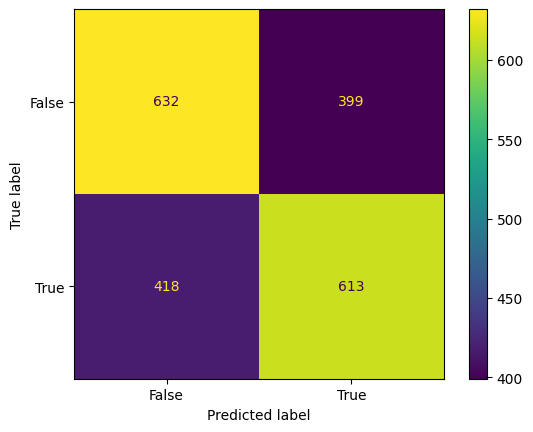

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# get the predictions on the test set
y_pred_test = model.predict(X_test_resampled)

# calculate the confusion matrix
cm = confusion_matrix(y_test_resampled, y_pred_test)

# plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()


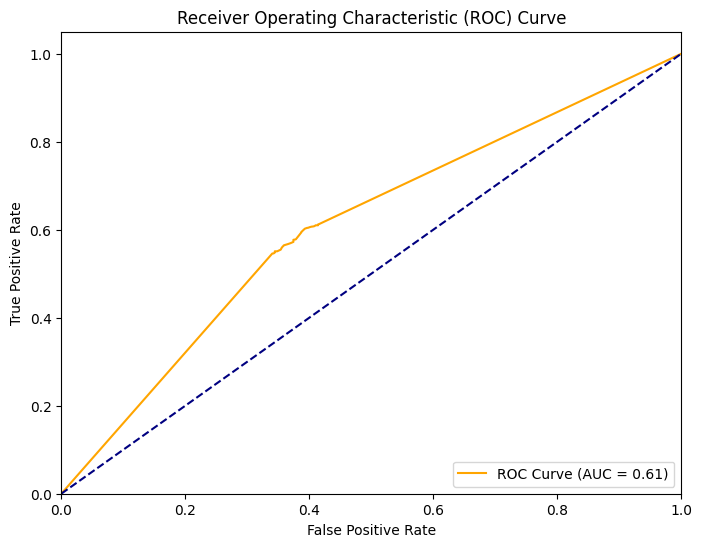

In [ ]:
# generate ROC curve and calculate AUC
y_pred_prob = model.predict_proba(X_test_resampled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_prob)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


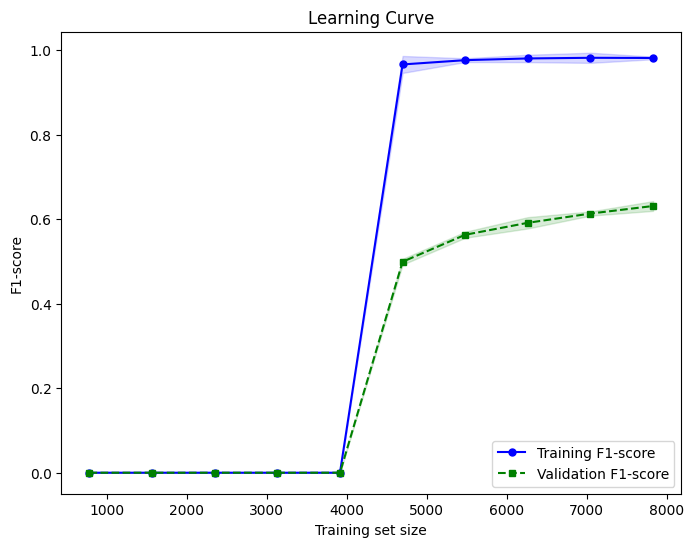

In [ ]:
# generate learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

# calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training F1-score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation F1-score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Training set size')
plt.ylabel('F1-score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


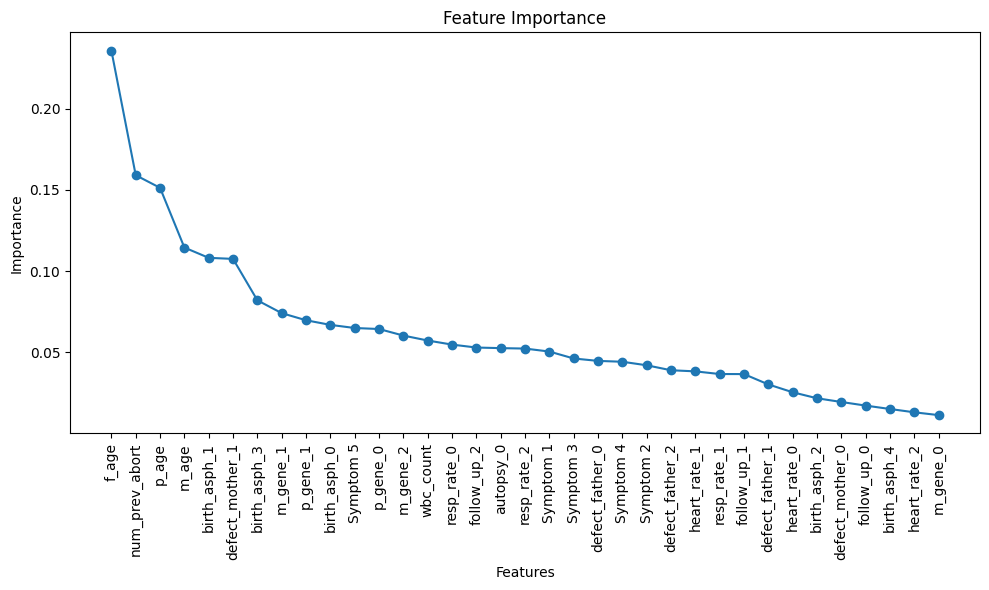

In [ ]:
# perform permutation importance
result = permutation_importance(model, X_train_resampled, y_train_resampled, n_repeats=10, random_state=0)

# get feature importance scores
importance = result.importances_mean

# get feature names
feature_names = X_train.columns

# sort feature importance scores and feature names in descending order
indices = importance.argsort()[::-1]
importance = importance[indices]
feature_names = feature_names[indices]

# plot feature importance graph
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.plot(range(X_train_resampled.shape[1]), importance, '-o')
plt.xticks(range(X_train_resampled.shape[1]), feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


##Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# define the model
model = LogisticRegression()

# define the hyperparameter grid to search
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [100, 500, 1000, 5000],
              'fit_intercept': [True, False],
              'class_weight': [None, 'balanced'],
              'dual': [True, False]}

# define the search using 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)

# perform the search
grid_result = grid.fit(X_train_resampled, y_train_resampled)

# print the best hyperparameters found
print("Best Hyperparameters: ", grid_result.best_params_)

# use the best hyperparameters to retrain the model
model = LogisticRegression(**grid_result.best_params_)
model.fit(X_train_resampled, y_train_resampled)

# evaluate the model on the validation set
y_pred_val = model.predict(X_val_resampled)
val_accuracy = accuracy_score(y_val_resampled, y_pred_val)
val_f1 = f1_score(y_val_resampled, y_pred_val)
val_cm_lr = confusion_matrix(y_val_resampled, y_pred_val)

print("Validation Accuracy: ", val_accuracy)
print("Validation F1-score: ", val_f1)
print("Validation Confusion Matrix: ")
print(val_cm_lr)

# evaluate the model on the test set
y_pred_test = model.predict(X_test_resampled)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
test_f1 = f1_score(y_test_resampled, y_pred_test)
test_cm = confusion_matrix(y_test_resampled, y_pred_test)

print("Test Accuracy: ", test_accuracy)
print("Test F1-score: ", test_f1)
print("Test Confusion Matrix: ")
print(test_cm)

Streaming output truncated to the last 5000 lines.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been depr

Best Hyperparameters:  {'C': 10, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': False, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy:  0.5309218203033839
Validation F1-score:  0.4987531172069825
Validation Confusion Matrix: 
[[510 347]
 [457 400]]
Test Accuracy:  0.54364694471387
Test F1-score:  0.530204692960559
Test Confusion Matrix: 
[[590 441]
 [500 531]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


###MOdel Graph

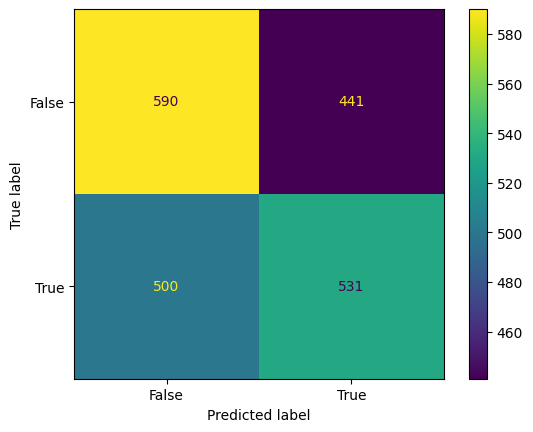

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# get the predictions on the test set
y_pred_test = model.predict(X_test_resampled)

# calculate the confusion matrix
cm = confusion_matrix(y_test_resampled, y_pred_test)

# plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()


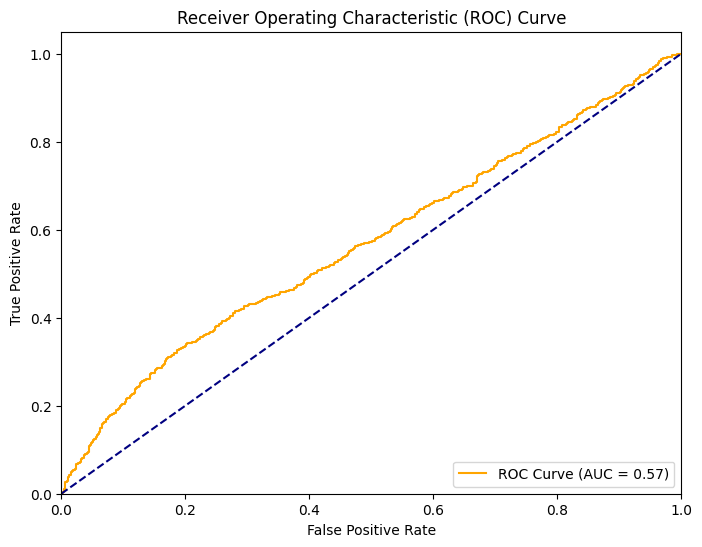

In [ ]:
# generate ROC curve and calculate AUC
y_pred_prob = model.predict_proba(X_test_resampled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_prob)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


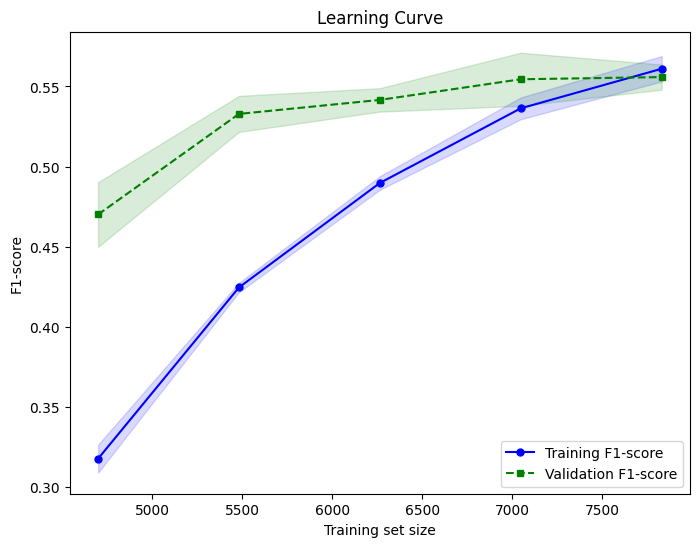

In [ ]:
# generate learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

# calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training F1-score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation F1-score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Training set size')
plt.ylabel('F1-score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


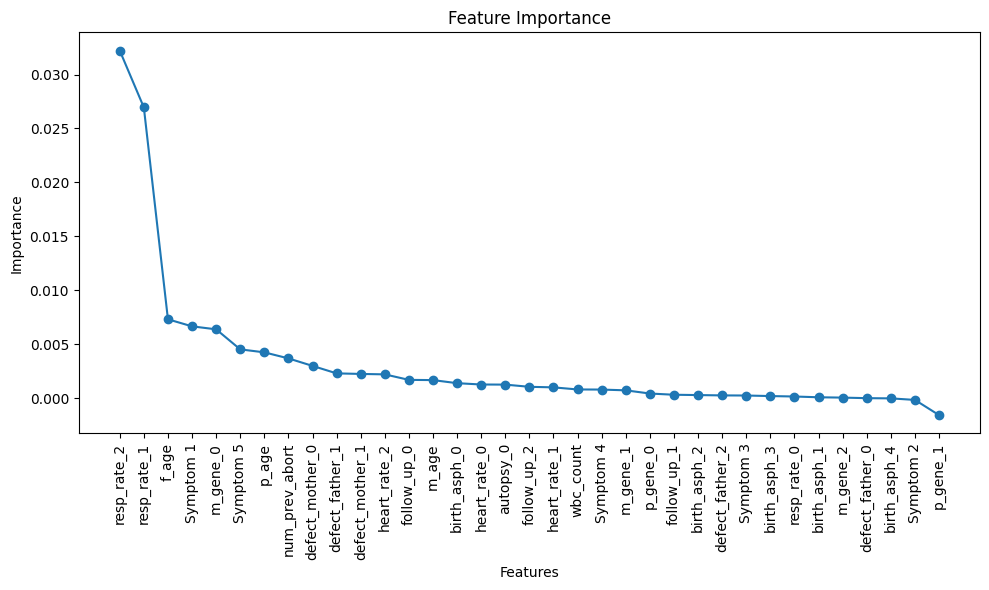

In [ ]:
# perform permutation importance
result = permutation_importance(model, X_train_resampled, y_train_resampled, n_repeats=10, random_state=0)

# get feature importance scores
importance = result.importances_mean

# get feature names
feature_names = X_train.columns

# sort feature importance scores and feature names in descending order
indices = importance.argsort()[::-1]
importance = importance[indices]
feature_names = feature_names[indices]

# plot feature importance graph
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.plot(range(X_train_resampled.shape[1]), importance, '-o')
plt.xticks(range(X_train_resampled.shape[1]), feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


##SVM

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# define the model
model = SVC()

# define the hyperparameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['rbf'],
              'degree': [2, 3, 4, 5],
              'gamma': ['scale', 'auto']}

# define the search using 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)

# perform the search
grid_result = grid.fit(X_train_resampled, y_train_resampled)

# print the best hyperparameters found
print("Best Hyperparameters: ", grid_result.best_params_)

# use the best hyperparameters to retrain the model
model = SVC(**grid_result.best_params_)
model.fit(X_train_resampled, y_train_resampled)

# evaluate the model on the validation set
y_pred_val = model.predict(X_val_resampled)
val_accuracy = accuracy_score(y_val_resampled, y_pred_val)
val_f1 = f1_score(y_val_resampled, y_pred_val)
val_cm = confusion_matrix(y_val_resampled, y_pred_val)

print("Validation Accuracy: ", val_accuracy)
print("Validation F1-score: ", val_f1)
print("Validation Confusion Matrix: ")
print(val_cm)

# evaluate the model on the test set
y_pred_test = model.predict(X_test_resampled)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
test_f1 = f1_score(y_test_resampled, y_pred_test)
test_cm = confusion_matrix(y_test_resampled, y_pred_test)

print("Test Accuracy: ", test_accuracy)
print("Test F1-score: ", test_f1)
print("Test Confusion Matrix: ")
print(test_cm)

Best Hyperparameters:  {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Validation Accuracy:  0.5733870967741935
Validation F1-score:  0.5387968613775066
Validation Confusion Matrix: 
[[402 218]
 [311 309]]
Test Accuracy:  0.5284015852047557
Test F1-score:  0.4878048780487805
Test Confusion Matrix: 
[[460 297]
 [417 340]]


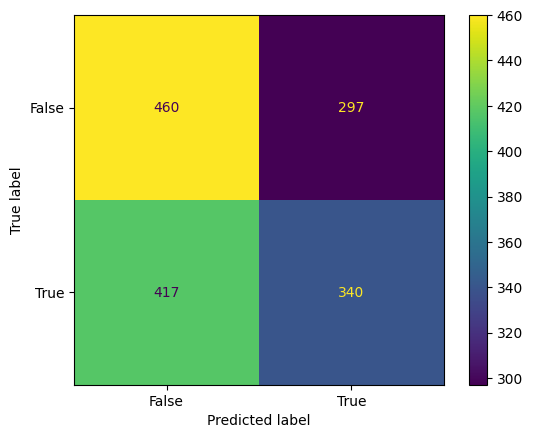

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# get the predictions on the test set
y_pred_test = model.predict(X_test_resampled)

# calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test_resampled, y_pred_test)

# plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()


In [ ]:
# generate ROC curve and calculate AUC
y_pred_prob = model.predict_proba(X_test_resampled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_prob)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


AttributeError: ignored

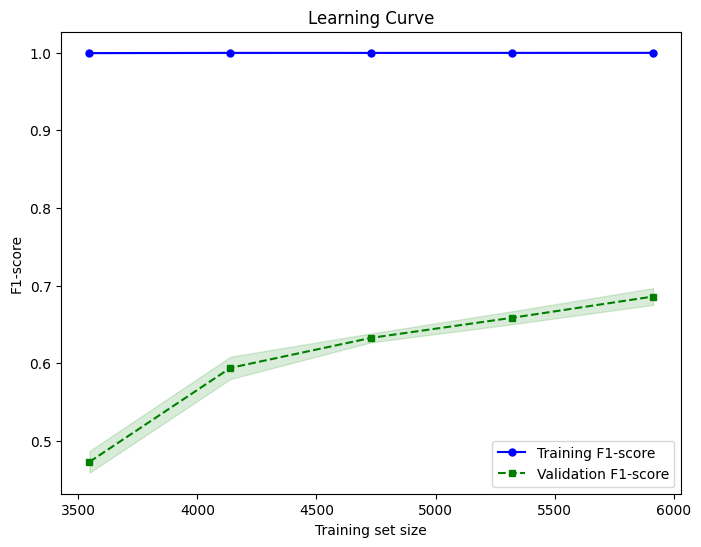

In [ ]:
# generate learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

# calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training F1-score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation F1-score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Training set size')
plt.ylabel('F1-score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


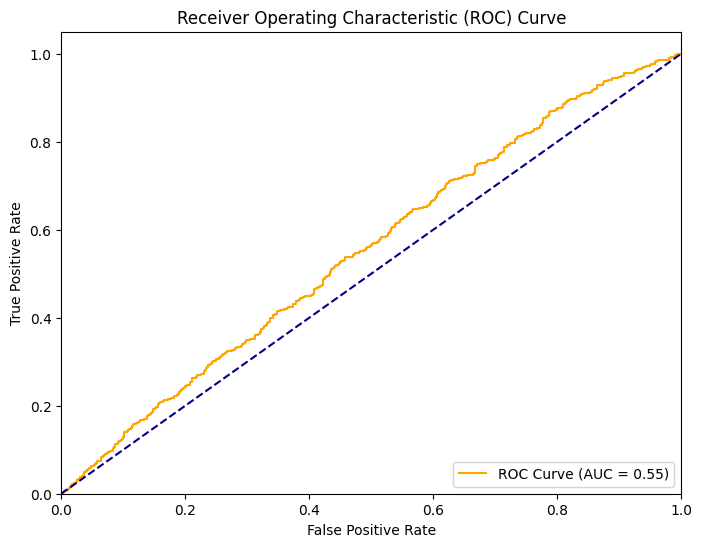

In [ ]:
# Generate predicted class labels
y_pred = model.predict(X_test_resampled)

# Calculate predicted class probabilities manually
y_pred_prob = model.decision_function(X_test_resampled)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


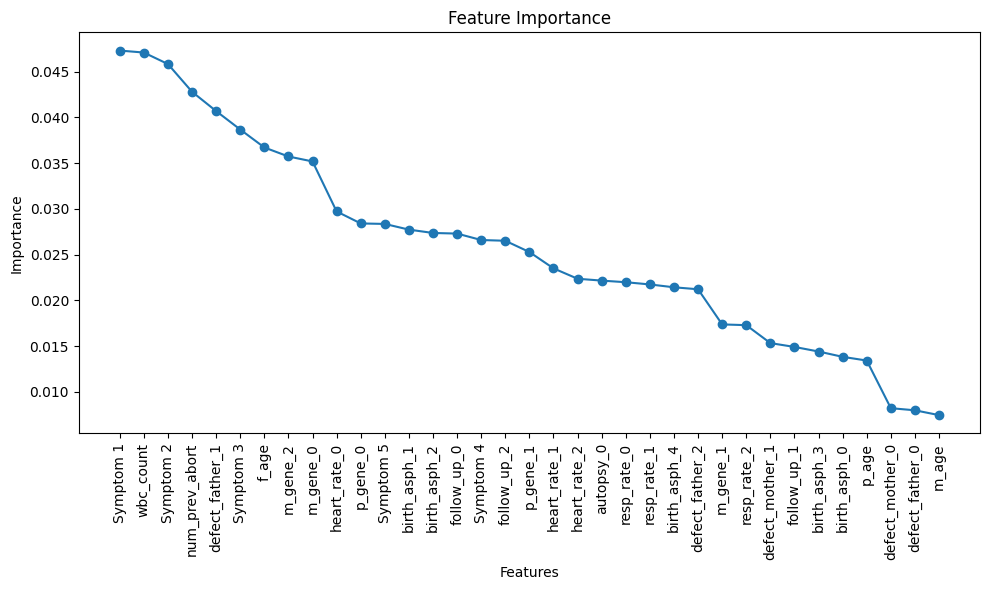

In [ ]:
# perform permutation importance
result = permutation_importance(model, X_train_resampled, y_train_resampled, n_repeats=10, random_state=0)

# get feature importance scores
importance = result.importances_mean

# get feature names
feature_names = X_train.columns

# sort feature importance scores and feature names in descending order
indices = importance.argsort()[::-1]
importance = importance[indices]
feature_names = feature_names[indices]

# plot feature importance graph
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.plot(range(X_train_resampled.shape[1]), importance, '-o')
plt.xticks(range(X_train_resampled.shape[1]), feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


##K-Nearest Neighbor

In [ ]:
from sklearn.metrics import confusion_matrix
#  define the model
model = KNeighborsClassifier()

# define the hyperparameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# define the search using 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)

# perform the search
grid_result = grid.fit(X_train_resampled, y_train_resampled)

# print the best hyperparameters found
print("Best Hyperparameters: ", grid_result.best_params_)

# use the best hyperparameters to retrain the model
model = KNeighborsClassifier(**grid_result.best_params_)
model.fit(X_train_resampled, y_train_resampled)

# evaluate the model on the validation set
y_pred_val = model.predict(X_val_resampled)
val_accuracy = accuracy_score(y_val_resampled, y_pred_val)
val_f1 = f1_score(y_val_resampled, y_pred_val)
val_cm_knn = confusion_matrix(y_val_resampled, y_pred_val)

print("Validation Accuracy: ", val_accuracy)
print("Validation F1-score: ", val_f1)
print("Validation Confusion Matrix: ", val_cm_knn)


# evaluate the model on the test set
y_pred_test = model.predict(X_test_resampled)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
test_f1 = f1_score(y_test_resampled, y_pred_test)
test_cm = confusion_matrix(y_test_resampled, y_pred_test)

print("Test Accuracy: ", test_accuracy)
print("Test F1-score: ", test_f1)
print("Test Confusion Matrix: ")
print(test_cm)

Best Hyperparameters:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Validation Accuracy:  0.5431738623103851
Validation F1-score:  0.5353115727002967
Validation Confusion Matrix:  [[480 377]
 [406 451]]
Test Accuracy:  0.5237633365664404
Test F1-score:  0.516256157635468
Test Confusion Matrix: 
[[556 475]
 [507 524]]


###Model graphs

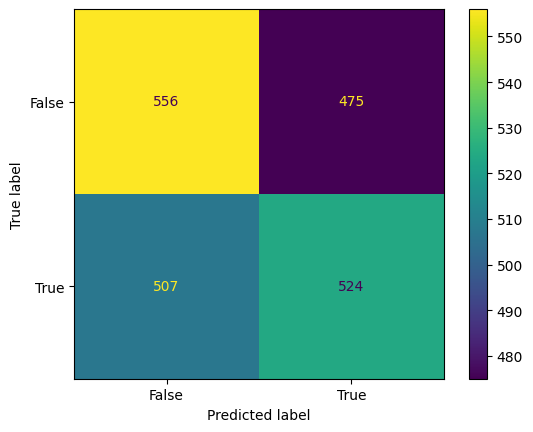

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# get the predictions on the test set
y_pred_test = model.predict(X_test_resampled)

# calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test_resampled, y_pred_test)

# plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()


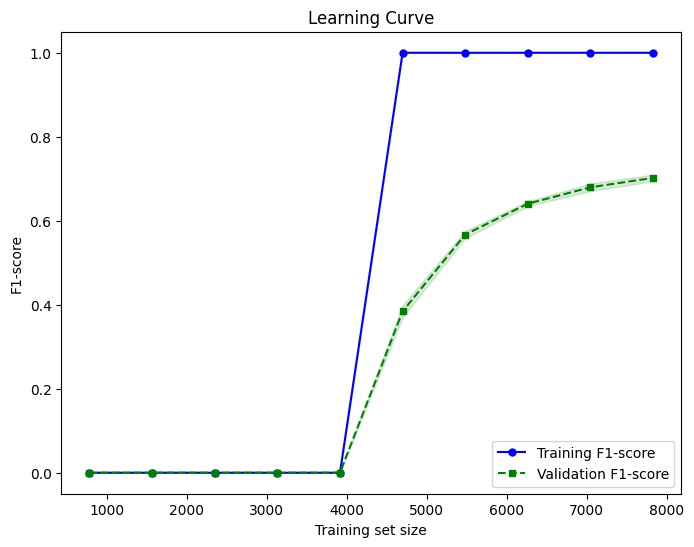

In [ ]:
# generate learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

# calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training F1-score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation F1-score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Training set size')
plt.ylabel('F1-score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


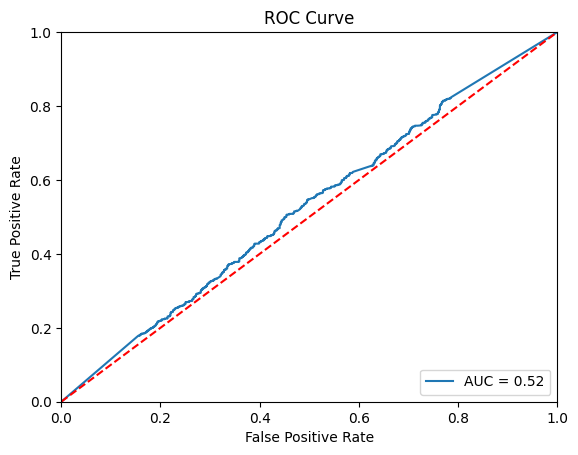

In [ ]:
# create AUC curve
y_pred_prob = model.predict_proba(X_test_resampled)[:, 1]
fpr, tpr, _ = roc_curve(y_test_resampled, y_pred_prob)
auc = roc_auc_score(y_test_resampled, y_pred_prob)
plt.plot(fpr, tpr, label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

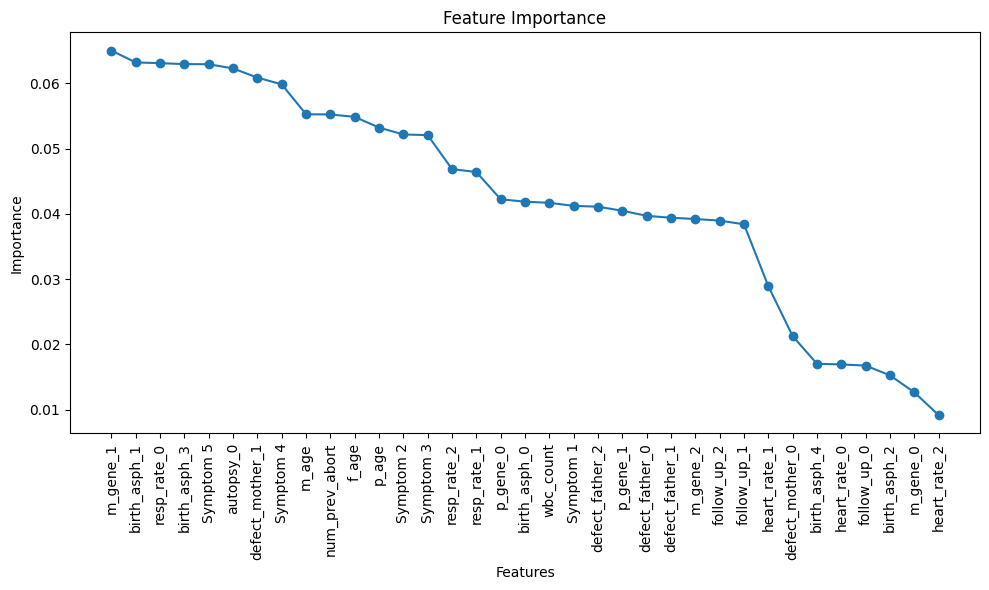

In [ ]:
# perform permutation importance
result = permutation_importance(model, X_train_resampled, y_train_resampled, n_repeats=10, random_state=0)

# get feature importance scores
importance = result.importances_mean

# get feature names
feature_names = X_train.columns

# sort feature importance scores and feature names in descending order
indices = importance.argsort()[::-1]
importance = importance[indices]
feature_names = feature_names[indices]

# plot feature importance graph
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.plot(range(X_train_resampled.shape[1]), importance, '-o')
plt.xticks(range(X_train_resampled.shape[1]), feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

##Random Forest

In [ ]:
from sklearn.metrics import confusion_matrix
# define the model
model = RandomForestClassifier(random_state=42)

# define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# define the search using 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)

# perform the search
grid_result = grid.fit(X_train_resampled, y_train_resampled)

# print the best hyperparameters found
print("Best Hyperparameters: ", grid_result.best_params_)

# use the best hyperparameters to retrain the model
model = RandomForestClassifier(**grid_result.best_params_, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# evaluate the model on the validation set
y_pred_val = model.predict(X_val_resampled)
val_accuracy = accuracy_score(y_val_resampled, y_pred_val)
val_f1 = f1_score(y_val_resampled, y_pred_val)
val_cm = confusion_matrix(y_val_resampled, y_pred_val)

print("Validation Accuracy: ", val_accuracy)
print("Validation F1-score: ", val_f1)
print("Validation Confusion Matrix: ")
print(val_cm)

# evaluate the model on the test set
y_pred_test = model.predict(X_test_resampled)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
test_f1 = f1_score(y_test_resampled, y_pred_test)
test_cm = confusion_matrix(y_test_resampled, y_pred_test)

print("Test Accuracy: ", test_accuracy)
print("Test F1-score: ", test_f1)
print("Test Confusion Matrix: ")
print(test_cm)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# get the predictions on the test set
y_pred_test = model.predict(X_test_resampled)

# calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test_resampled, y_pred_test)

# plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()


In [ ]:
# generate ROC curve and calculate AUC
y_pred_prob = model.predict_proba(X_test_resampled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_prob)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# generate learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

# calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training F1-score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation F1-score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Training set size')
plt.ylabel('F1-score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# create AUC curve
y_pred_prob = model.predict_proba(X_test_resampled)[:, 1]
fpr, tpr, _ = roc_curve(y_test_resampled, y_pred_prob)
auc = roc_auc_score(y_test_resampled, y_pred_prob)
plt.plot(fpr, tpr, label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# perform permutation importance
result = permutation_importance(model, X_train_resampled, y_train_resampled, n_repeats=10, random_state=0)

# get feature importance scores
importance = result.importances_mean

# get feature names
feature_names = X_train.columns

# sort feature importance scores and feature names in descending order
indices = importance.argsort()[::-1]
importance = importance[indices]
feature_names = feature_names[indices]

# plot feature importance graph
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.plot(range(X_train_resampled.shape[1]), importance, '-o')
plt.xticks(range(X_train_resampled.shape[1]), feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


##Hidden Markov Model(HMM)

In [ ]:
# import numpy as np

# # Select the features
# selected_features = ['f_age', 'Symptom 3', 'Symptom 5', 'defect_mother_0', 'defect_mother_1', 'defect_father_0',
#                      'defect_father_1', 'heart_rate_0', 'heart_rate_1', 'heart_rate_2', 'resp_rate_1', 'resp_rate_2',
#                      'm_gene_1', 'm_gene_2', 'p_gene_0', 'p_gene_1', 'birth_asph_1', 'birth_asph_2', 'birth_asph_4',
#                      'autopsy_1', 'folic_acid_periconceptional_0', 'maternal_ill_1', 'rad_exp_3', 'sub_abuse_0',
#                      'sub_abuse_2', 'sub_abuse_3', 'assisted_conception_0', 'assisted_conception_1',
#                      'assisted_conception_2', 'prev_preg_anom_0', 'prev_preg_anom_1', 'prev_preg_anom_2',
#                      'birth_defects_0', 'birth_defects_1', 'birth_defects_2']

# # Extract the selected features
# X = data[:, [i for i, col in enumerate(data[0]) if col in selected_features]]

# # Define the HMM model
# model = hmm.GaussianHMM(n_components=3, covariance_type='full')

# # Train the model
# model.fit(X)

# # Make a prediction for a new sequence
# new_sequence = [[33, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
# prediction = model.predict(new_sequence)

# print('The predicted state sequence is:', prediction)